In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from numpy.linalg import norm
from collections import Counter
from time import time
from matplotlib import collections as mc
import os

print(os.listdir("../input"))

['sample_submission.csv', 'cities.csv']


**Loading Data-cities.csv**

In [51]:
df_cities = pd.read_csv("../input/cities.csv")

In [52]:
df_cities.head()

,CityId,X,Y
0,0,316.836739,2202.340707
1,1,4377.405972,336.602082
2,2,3454.158198,2820.053011
3,3,4688.099298,2935.898056
4,4,1010.696952,3236.750989


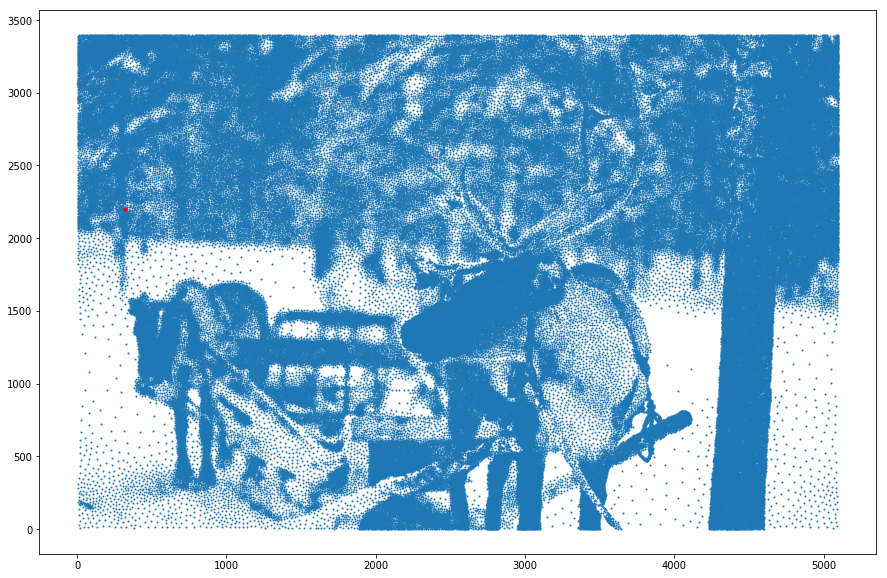

In [53]:
plt.figure(figsize=(15, 10))
plt.scatter(df_cities.X, df_cities.Y, s=1)
plt.scatter(df_cities.iloc[0: 1,1], df_cities.iloc[0: 1, 2], s=10, c="red")
plt.grid(False)
plt.show()

**Prime Cities**


Determining whether integers are prime, using the algorithm using Boolean data type we identify which cities are prime cites and which aren't.

In [54]:
def isPrime(n):
    primes = [True for i in range (n+1)]
    primes[0] = False
    primes[1] = False
    for i in range(2, int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = find_primes(max(df_cities.CityId))

In [55]:
nb_cities = max(df_cities.CityId)
print ("Number of cities to visit: ", nb_cities)

Number of cities to visit:  197768


In [56]:
primes = np.array(isPrime(nb_cities)).astype(int)
df_cities['P'] = isPrime (max(df_cities.CityId))
df_cities2 = isPrime(max(df_cities.CityId))
df_cities.head(10)

,CityId,X,Y,P
0,0,316.836739,2202.340707,False
1,1,4377.405972,336.602082,False
2,2,3454.158198,2820.053011,True
3,3,4688.099298,2935.898056,True
4,4,1010.696952,3236.750989,False
5,5,2474.230877,1435.514651,True
6,6,1029.277795,2721.800952,False
7,7,3408.887685,199.585793,True
8,8,1304.006125,2657.427246,False
9,9,4211.525725,2294.595208,False


**Calculating distance between two cities**

In [57]:
def pair_distance(x,y):
    x1 = (df_cities.X[x] - df_cities.X[y]) ** 2
    x2 = (df_cities.Y[x] - df_cities.Y[y]) ** 2
    return np.sqrt(x1 + x2)

In [61]:
def total_distance(path):
    distance = [pair_distance(path[x],path[x+1])+ 0.1 
* pair_distance(path[x], path [x+1])
    if (x+1)%10 == 0 and df_cities.P[path[x]] == 
False else pair_distance(path[x],path[x+1]) 
    for x in range(len(path)-1)]
    return np.sum(distance)

**Dumbest Path**

In [62]:
dumbest_path = df_cities['CityId'].values

dumbest_path = np.append(dumbest_path,0)

In [63]:
print('Total distance with sorted city path is '+ "{:,}".format(total_distance(dumbest_path)))

Total distance with sorted city path is 446,884,407.52120817


In [66]:
X=[]
for x in range(max(df_cities.CityId+1)):
    X.append(df_cities['X'][x])
Y=[]
for x in range(max(df_cities.CityId+1)):
    Y.append(df_cities['Y'][x])
path=[]
for x in range(1,max(df_cities.CityId)+1):
    path.append(x)

**Merge Sort Data Structure**

In [67]:
def merge(s1,s2,S):
    i =j=k=0
    while i < len(s1) and j < len(s2):
        if Y[s1[i]] < Y[s2[j]]:
            S[k] = s1[i]
            i+=1
        else:
            S[k] = s2[j]
            j+=1
        k+=1
        
def merge_sort(S):
    if len(S) > 1:
        mid = len(S) // 2
        s1 = S[0:mid]
        s2 = S[mid:]
    
        merge_sort(s1)
        merge_sort(s2)
        
        merge(s1,s1,S)

In [68]:
mergesort_path=[]
for x in range(1,max(df_cities.CityId)+1):
    mergesort_path.append(x)
merge_sort(mergesort_path)

In [70]:
mergesorted_path=[0]
for i in range(len(mergesort_path)):
    mergesorted_path.append(mergesort_path[i])
mergesorted_path.append(0)

In [71]:
print('Total distance Merge sorted cities using Y is: '+ "{:,}".format(total_distance(mergesorted_path)))

Total distance Merge sorted cities using Y is: 153,363,561.8943607


**Quick Sort Structure**

In [72]:
import sys
sys.setrecursionlimit(500000)

In [73]:
def quick_sort(A):
    quick_sort2(A, 0, len(A)-1)

In [74]:
def quick_sort2(A, low, hi):
        if low < hi:
            p = partition(A, low, hi)
            quick_sort2(A, low, p - 1)
            quick_sort2(A, p + 1, hi)

In [75]:
def get_pivot(A, low, hi):
    mid = (hi + low) // 2
    s = sorted([A[low], A[mid], A[hi]])
    if s[1] == A[low]:
        return low
    elif s[1] == A[mid]:
        return mid
    return hi

In [76]:
def partition(A, low, hi):
    pivotIndex = get_pivot(A, low, hi)
    pivotValue = A[pivotIndex]
    A[pivotIndex], A[low] = A[low], A[pivotIndex]
    border = low

    for i in range(low, hi+1):
        if X[A[i]] < X[pivotValue]:
            border += 1
            A[i], A[border] = A[border], A[i]
    A[low], A[border] = A[border], A[low]

    return (border)

In [79]:
quicksort_path=[]
for x in range(1,max(df_cities.CityId)+1):
        quicksort_path.append(x)

In [82]:
quick_sort(quicksort_path)

In [83]:
quicksorted_path=[0]
for x in range(len(quicksort_path)):
    quicksorted_path.append(quicksort_path[x])
quicksorted_path.append(0)

In [84]:
print('Total distance with the insertion Sorted city based on X path is '+ "{:,}".format(total_distance(quicksorted_path)))

Total distance with the insertion Sorted city based on X path is 196,478,241.18919766


**Binary Search Tree Algorithm**

In [85]:
from random import randint
tree_path = []
class node:
    def __init__(self, value = None):
        self.value = value
        self.left = None
        self.right = None
        
class binary_search_tree:
    def __init__(self):
        self.root = None
        
    def insert(self, value):
        if self.root == None:
            self.root = node(value)
        else:
            self._insert(value, self.root)
    
    
    def _insert(self, value, cur_node):
        if Y[value] <= Y[cur_node.value]:
            if cur_node.left == None:
                cur_node.left = node(value)
            else:
                self._insert(value, cur_node.left)
        elif X[value] >= X[cur_node.value]:
            if cur_node.right == None:
                cur_node.right = node(value)
            else:
                self._insert(value, cur_node.right)
        else:
            tree_path.append(path[cur_node.value])

    
    
    def print_tree(self):
        if self.root != None:
            self._print_tree(self.root)
    
    
    def _print_tree(self, cur_node):
        if cur_node != None:
            self._print_tree(cur_node.left)
            tree_path.append(path[cur_node.value])
            self._print_tree(cur_node.right)    

                
def fill_tree(tree):
    for x in range(len(path)-1):
        cur_elem = path[x]
        tree.insert(cur_elem)
    return tree

tree = binary_search_tree()
tree = fill_tree(tree)
tree.print_tree()

print('Total distance with the Binary Tree sorting city based on X path is '+ "{:,}".format(total_distance(tree_path)))

Total distance with the Binary Tree sorting city based on X path is 162,037,821.2596188


**Greed graph search algorithm**

In [92]:
penalization = 0.1 * (1 - primes) + 1
def dist_matrix(coords, i, penalize=False):
    begin = np.array([df_cities.X[i], df_cities.Y[i]])[:, np.newaxis]
    mat =  coords - begin
    if penalize:
        return np.linalg.norm(mat, ord=2, axis=0) * penalization
    else:
        return np.linalg.norm(mat, ord=2, axis=0)
    
    
def get_next_city(dist, avail):
    return avail[np.argmin(dist[avail])]   
    
    
coordinates = np.array([df_cities.X, df_cities.Y])   
current_city = 0     
left_cities = np.array(df_cities.CityId)[1:]    
greed_path = [0]    
stepNumber = 1   

t0 = time()

while left_cities.size > 0:
    if stepNumber % 10000 == 0: #We print the progress of the algorithm
        print(f"Time elapsed : {time() - t0} - Number of cities left : {left_cities.size}")
    favorize_prime = (stepNumber % 10 == 9)
    distances = dist_matrix(coordinates, current_city, penalize=favorize_prime)
    current_city = get_next_city(distances, left_cities)     # Get the closest city and go to it
    left_cities = np.setdiff1d(left_cities, np.array([current_city]))
    greed_path.append(current_city)
    stepNumber += 1
    
    

Time elapsed : 90.43701696395874 - Number of cities left : 187769
Time elapsed : 177.90307521820068 - Number of cities left : 177769
Time elapsed : 258.1962945461273 - Number of cities left : 167769
Time elapsed : 333.417028427124 - Number of cities left : 157769
Time elapsed : 408.0935583114624 - Number of cities left : 147769
Time elapsed : 463.16706919670105 - Number of cities left : 137769
Time elapsed : 508.7367389202118 - Number of cities left : 127769
Time elapsed : 551.9449064731598 - Number of cities left : 117769
Time elapsed : 593.6553838253021 - Number of cities left : 107769
Time elapsed : 636.4692928791046 - Number of cities left : 97769
Time elapsed : 693.8133070468903 - Number of cities left : 87769
Time elapsed : 749.4550974369049 - Number of cities left : 77769
Time elapsed : 798.1905522346497 - Number of cities left : 67769
Time elapsed : 829.0193033218384 - Number of cities left : 57769
Time elapsed : 857.5544993877411 - Number of cities left : 47769
Time elapsed : 

In [93]:
print(f"Loop lasted {(time() - t0) // 60} minutes ")

Loop lasted 17.0 minutes 


In [94]:
greed_path.append(0)
print(len(greed_path))
print('Total distance with the Binary Tree sorting city based on X path is '+ "{:,}".format(total_distance(greed_path)))

197770
Total distance with the Binary Tree sorting city based on X path is 1,811,964.6610175993


Final Submission

In [95]:
def submission():
    dict = {'Path': tree_path}  
    df = pd.DataFrame(dict) 
    #write data from dataframe to csv file
    df.to_csv('Final_Submission.csv', index=False)

In [96]:
submission()